In [1]:
# Import packages

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Write code to start Streamlit web app

st.write("Hello world")

Figured out that Streamlit requires a .py (python) file, not .ipynb (notebook).

In [2]:
# Launched Streamlit with Employee.csv using command "Streamlit run app.py"

pr_df = pd.read_csv('PerformanceRating.csv')
st.write(pr_df)


2024-10-12 11:46:24.725 
  command:

    streamlit run d:\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Checked for null values using df.info(). There are 0 missing values.

In [3]:
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


Defined DataFrame for PerformanceRating.csv, and checked for null values. 

In [4]:
emp_df = pd.read_csv('Employee.csv')
emp_df.info()
emp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


Merging DataFrames Employee.csv and PerformanceRate.csv

In [5]:
# Merge DataFrames
merged_df = pr_df.merge(emp_df, how='outer', on='EmployeeID', left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=None, indicator=False, validate=None)

In [6]:
# Rename columns
merged_df.rename(columns={'PerformanceID': 'Performance ID', 'EmployeeID': 'Employee ID', 'ReviewDate': 'Review Date', 'EnvironmentSatisfaction': 'Environment Satisfaction',
                          'JobSatisfaction': 'Job Satisfaction', 'RelationshipSatisfaction': 'Relationship Satisfaction', 'TrainingOpportunitiesWithinYear': 'Training Opportunities Within Year',
                          'TrainingOpportunitiesTaken': 'Training Opportunities Taken', 'WorkLifeBalance': 'Work-Life Balance', 'SelfRating': 'Self Rating', 'ManagerRating': 'Manager Rating',
                          'FirstName': 'First Name', 'LastName': 'Last Name', 'BusinessTravel': 'Business Travel', 'DistanceFromHome (KM)': 'Distance From Home (KM)',
                          'EducationField': 'Education Field', 'JobRole': 'Job Role', 'MaritalStatus': 'Marital Status', 'StockOptionLevel': 'Stock Option Level', 'OverTime': 'Over Time',
                          'HireDate': 'Hire Date', 'YearsAtCompany': 'Years At Company', 'YearsInMostRecentRole': 'Years In Most Recent Role',
                          'YearsSinceLastPromotion': 'Years Since Last Promotion','YearsWithCurrManager': 'Years With Current Manager'}, inplace=True)

In [7]:
# Display DataFrame in Streamlit
df = st.dataframe(merged_df)

In [8]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Performance ID                      6709 non-null   object 
 1   Employee ID                         6899 non-null   object 
 2   Review Date                         6709 non-null   object 
 3   Environment Satisfaction            6709 non-null   float64
 4   Job Satisfaction                    6709 non-null   float64
 5   Relationship Satisfaction           6709 non-null   float64
 6   Training Opportunities Within Year  6709 non-null   float64
 7   Training Opportunities Taken        6709 non-null   float64
 8   Work-Life Balance                   6709 non-null   float64
 9   Self Rating                         6709 non-null   float64
 10  Manager Rating                      6709 non-null   float64
 11  First Name                          6899 no

,Performance ID,Employee ID,Review Date,Environment Satisfaction,Job Satisfaction,Relationship Satisfaction,Training Opportunities Within Year,Training Opportunities Taken,Work-Life Balance,Self Rating,...,Marital Status,Salary,Stock Option Level,Over Time,Hire Date,Attrition,Years At Company,Years In Most Recent Role,Years Since Last Promotion,Years With Current Manager
0,NaN,001A-8F88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Married,27763,0,No,2021-09-05,No,1,0,1,0
1,PR4067,005C-E0FB,6/17/2020,3.0,3.0,2.0,1.0,2.0,2.0,4.0,...,Married,56155,1,No,2017-08-26,No,5,2,2,0
2,PR5070,005C-E0FB,6/17/2021,4.0,4.0,5.0,1.0,1.0,5.0,3.0,...,Married,56155,1,No,2017-08-26,No,5,2,2,0
3,PR6165,005C-E0FB,6/17/2022,3.0,4.0,5.0,3.0,0.0,4.0,4.0,...,Married,56155,1,No,2017-08-26,No,5,2,2,0
4,PR1165,00A3-2445,6/19/2016,4.0,5.0,4.0,2.0,2.0,5.0,4.0,...,Married,126238,0,No,2012-03-08,No,10,3,6,6


Count the number of null values in merged dataframe.

In [9]:
NullCells = merged_df['Performance ID'].isnull().sum()
print(NullCells)

190


Out of 1470 employees, 190 don't have performance data, and 1280 that do.

Chart histogram with employees who left and who stayed using Attrition (Yes/No) to create 2 data frames to compare.

In [10]:
# DataFrame of employees that left.
df_left = merged_df[merged_df['Attrition'] == 'Yes']
df_left.head()

,Performance ID,Employee ID,Review Date,Environment Satisfaction,Job Satisfaction,Relationship Satisfaction,Training Opportunities Within Year,Training Opportunities Taken,Work-Life Balance,Self Rating,...,Marital Status,Salary,Stock Option Level,Over Time,Hire Date,Attrition,Years At Company,Years In Most Recent Role,Years Since Last Promotion,Years With Current Manager
12,PR1123,00B0-F199,5/21/2016,3.0,3.0,5.0,3.0,2.0,5.0,5.0,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0
13,PR1678,00B0-F199,5/21/2017,4.0,3.0,4.0,2.0,0.0,2.0,4.0,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0
14,PR2339,00B0-F199,5/21/2018,3.0,4.0,4.0,2.0,1.0,3.0,3.0,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0
15,PR3099,00B0-F199,5/21/2019,5.0,4.0,3.0,3.0,3.0,5.0,4.0,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0
16,PR342,00B0-F199,5/22/2014,3.0,5.0,3.0,1.0,3.0,2.0,3.0,...,Married,97824,1,Yes,2020-03-16,Yes,1,0,1,0


In [11]:
# DataFrame of employees that stayed.
df_sty = merged_df[merged_df['Attrition'] == 'No']
df_sty.head()

,Performance ID,Employee ID,Review Date,Environment Satisfaction,Job Satisfaction,Relationship Satisfaction,Training Opportunities Within Year,Training Opportunities Taken,Work-Life Balance,Self Rating,...,Marital Status,Salary,Stock Option Level,Over Time,Hire Date,Attrition,Years At Company,Years In Most Recent Role,Years Since Last Promotion,Years With Current Manager
0,NaN,001A-8F88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Married,27763,0,No,2021-09-05,No,1,0,1,0
1,PR4067,005C-E0FB,6/17/2020,3.0,3.0,2.0,1.0,2.0,2.0,4.0,...,Married,56155,1,No,2017-08-26,No,5,2,2,0
2,PR5070,005C-E0FB,6/17/2021,4.0,4.0,5.0,1.0,1.0,5.0,3.0,...,Married,56155,1,No,2017-08-26,No,5,2,2,0
3,PR6165,005C-E0FB,6/17/2022,3.0,4.0,5.0,3.0,0.0,4.0,4.0,...,Married,56155,1,No,2017-08-26,No,5,2,2,0
4,PR1165,00A3-2445,6/19/2016,4.0,5.0,4.0,2.0,2.0,5.0,4.0,...,Married,126238,0,No,2012-03-08,No,10,3,6,6


Histogram showing Environment Satisfaction of Employees that left. Histograms will show the distribution of where employees land.

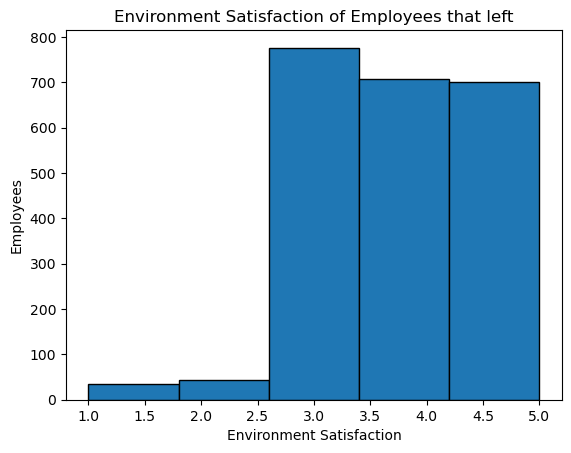

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [12]:
# Create histogram
plt.hist(df_left['Environment Satisfaction'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Environment Satisfaction')
plt.ylabel('Employees')
plt.title('Environment Satisfaction of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

Histogram showing Environment Satisfaction of Employees that stayed.

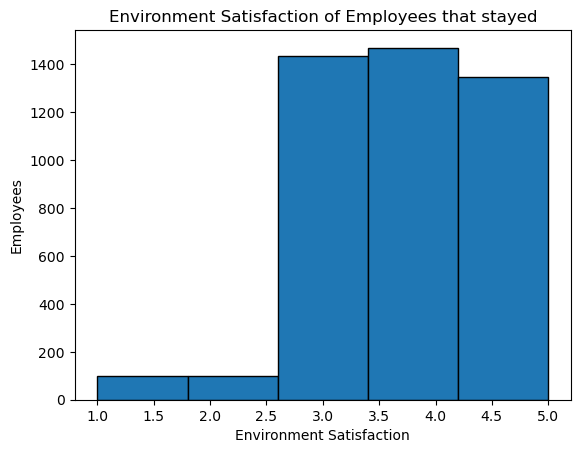

DeltaGenerator()

In [13]:
# Create histogram
plt.hist(df_sty['Environment Satisfaction'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Environment Satisfaction')
plt.ylabel('Employees')
plt.title('Environment Satisfaction of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## It looks like Environment Satisfaction skews high amongst employees who left and stayed.

Histogram showing Job Satisfaction of Employees that left.

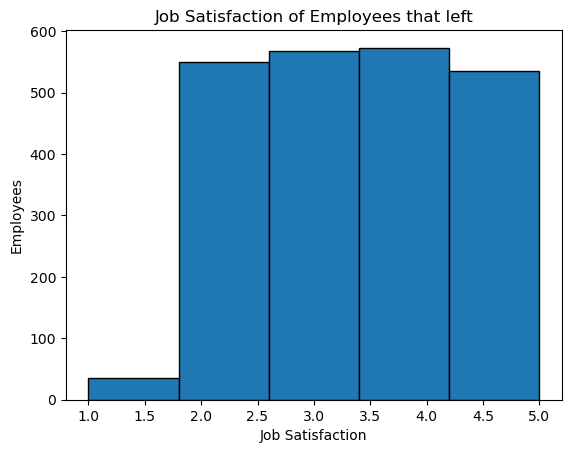

DeltaGenerator()

In [14]:
# Create histogram
plt.hist(df_left['Job Satisfaction'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Job Satisfaction')
plt.ylabel('Employees')
plt.title('Job Satisfaction of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

Histogram showing Job Satisfaction of Employees that stayed.

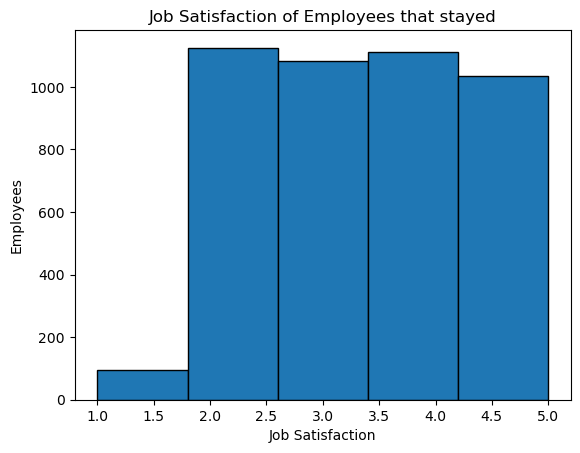

DeltaGenerator()

In [15]:
# Create histogram
plt.hist(df_sty['Job Satisfaction'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Job Satisfaction')
plt.ylabel('Employees')
plt.title('Job Satisfaction of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## Job Satisfaction skews high amongst employees who left and stayed as well.

Histogram showing Relationship Satisfaction of Employees that left.

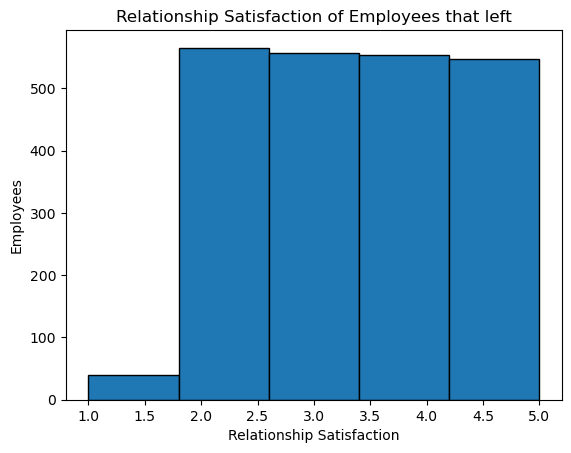

DeltaGenerator()

In [16]:
# Create histogram
plt.hist(df_left['Relationship Satisfaction'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Employees')
plt.title('Relationship Satisfaction of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

Histogram showing Relationship Satisfaction of Employees that stayed.

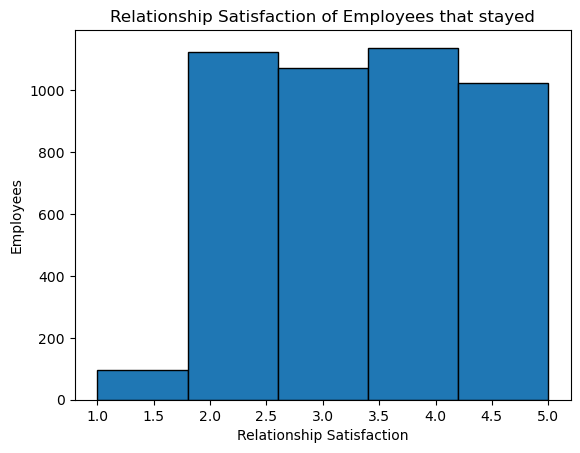

DeltaGenerator()

In [17]:
# Create histogram
plt.hist(df_sty['Relationship Satisfaction'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Employees')
plt.title('Relationship Satisfaction of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## Across all 3 Satisfaction Criteria employees who left and stayed similarly skew high.

Histogram showing the number of years since employees were promoted from Employees that left.

In [18]:
max_num_yrs = df_left['Years Since Last Promotion'].max()
print(max_num_yrs)

9


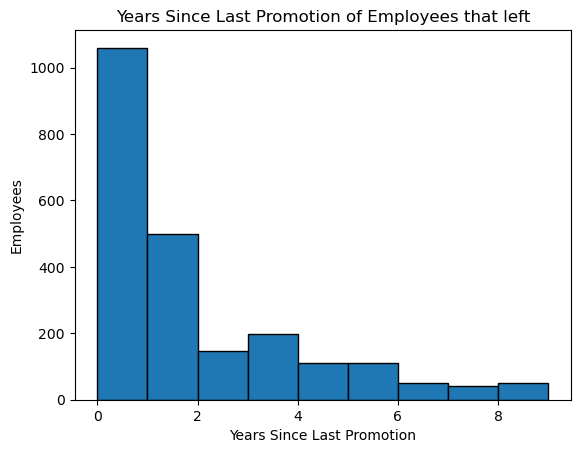

DeltaGenerator()

In [19]:
# Create histogram
plt.hist(df_left['Years Since Last Promotion'], bins=9, edgecolor='black')

# Add labels and title
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Employees')
plt.title('Years Since Last Promotion of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

Histogram showing the number of years since employees were promoted from Employees that stayed.

In [20]:
max_num_yrs = df_sty['Years Since Last Promotion'].max()
print(max_num_yrs)

10


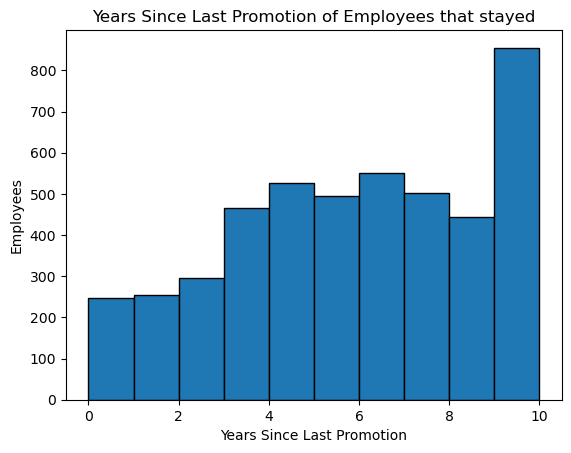

DeltaGenerator()

In [21]:
# Create histogram
plt.hist(df_sty['Years Since Last Promotion'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Employees')
plt.title('Years Since Last Promotion of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## It seems like the employees who were promoted less than a year before left the company. As opposed to those who had more years since their last promotion.

In [22]:
max_num_yrs = df_left['Self Rating'].max()
print(max_num_yrs)

5.0


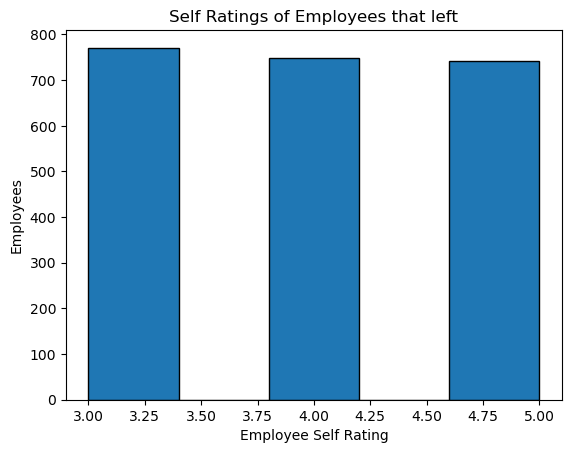

DeltaGenerator()

In [23]:
# Create histogram
plt.hist(df_left['Self Rating'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Employee Self Rating')
plt.ylabel('Employees')
plt.title('Self Ratings of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

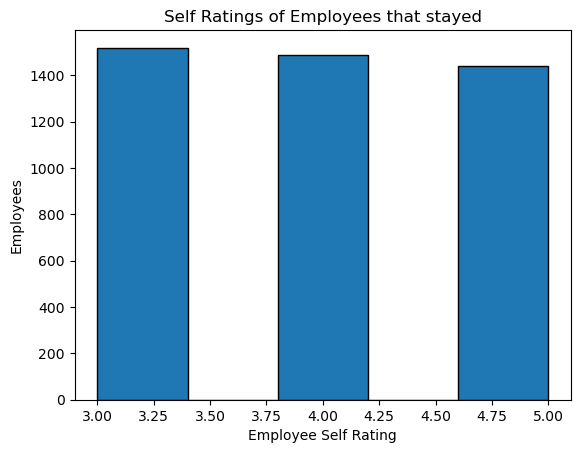

DeltaGenerator()

In [24]:
# Create histogram
plt.hist(df_sty['Self Rating'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Employee Self Rating')
plt.ylabel('Employees')
plt.title('Self Ratings of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## No big differences in employee self ratings between those who left and those who stayed.

In [25]:
max_num_yrs = df_sty['Manager Rating'].max()
print(max_num_yrs)

5.0


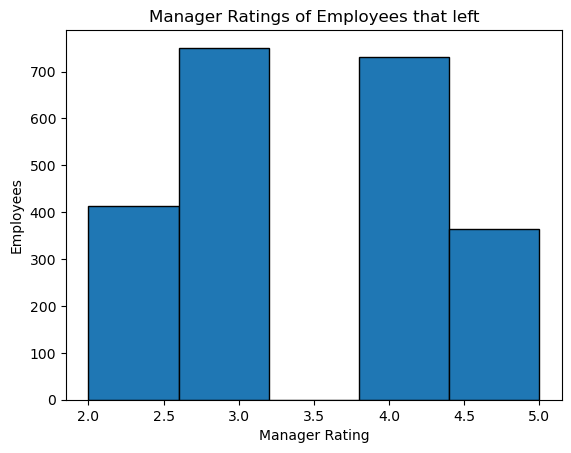

DeltaGenerator()

In [26]:
# Create histogram
plt.hist(df_left['Manager Rating'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Manager Rating')
plt.ylabel('Employees')
plt.title('Manager Ratings of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

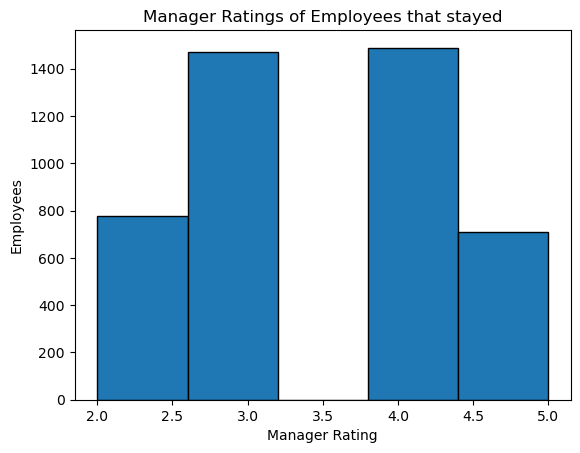

DeltaGenerator()

In [27]:
# Create histogram
plt.hist(df_sty['Manager Rating'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Manager Rating')
plt.ylabel('Employees')
plt.title('Manager Ratings of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## Manager ratings were similar across both groups.

In [28]:
max = df_left['Work-Life Balance'].max()
mean = df_left['Work-Life Balance'].mean()
median = df_left['Work-Life Balance'].median()
print(max)
print(mean)
print(median)

5.0
3.4201680672268906
3.0


In [29]:
max = df_sty['Work-Life Balance'].max()
mean = df_sty['Work-Life Balance'].mean()
median = df_sty['Work-Life Balance'].median()
print(max)
print(mean)
print(median)

5.0
3.411870503597122
3.0


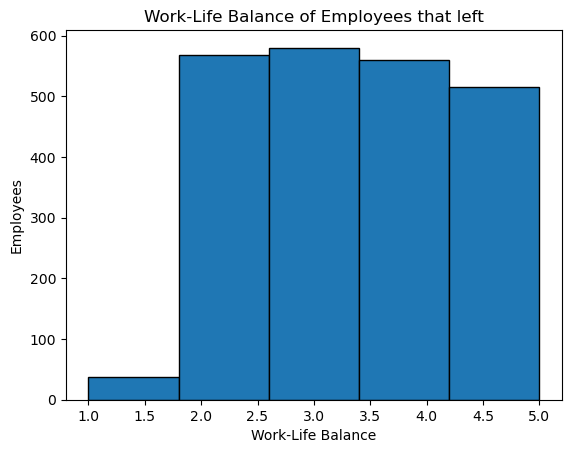

DeltaGenerator()

In [30]:
# Create histogram
plt.hist(df_left['Work-Life Balance'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Work-Life Balance')
plt.ylabel('Employees')
plt.title('Work-Life Balance of Employees that left')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

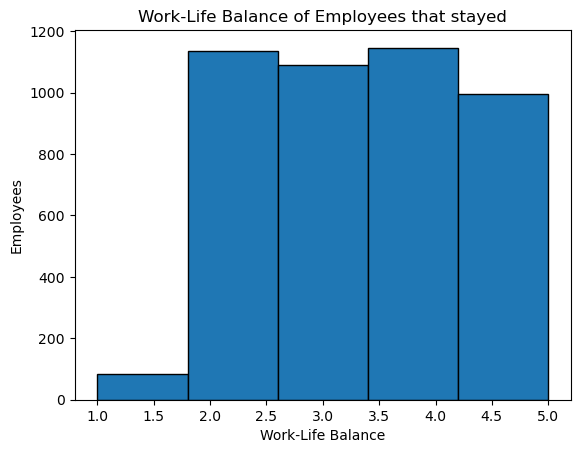

DeltaGenerator()

In [31]:
# Create histogram
plt.hist(df_sty['Work-Life Balance'], bins=5, edgecolor='black')

# Add labels and title
plt.xlabel('Work-Life Balance')
plt.ylabel('Employees')
plt.title('Work-Life Balance of Employees that stayed')

# Show the plot
plt.show()

# Show the plot in Streamlit
st.pyplot(plt)

## Bar chart comparing Training Opportunities Within Year and Training Opportunities Taken.

In [32]:
# Grouping data if needed (e.g., by department)
grouped_data = merged_df.groupby('Department')[['Training Opportunities Within Year', 'Training Opportunities Taken']].sum().reset_index()


<Figure size 640x480 with 0 Axes>

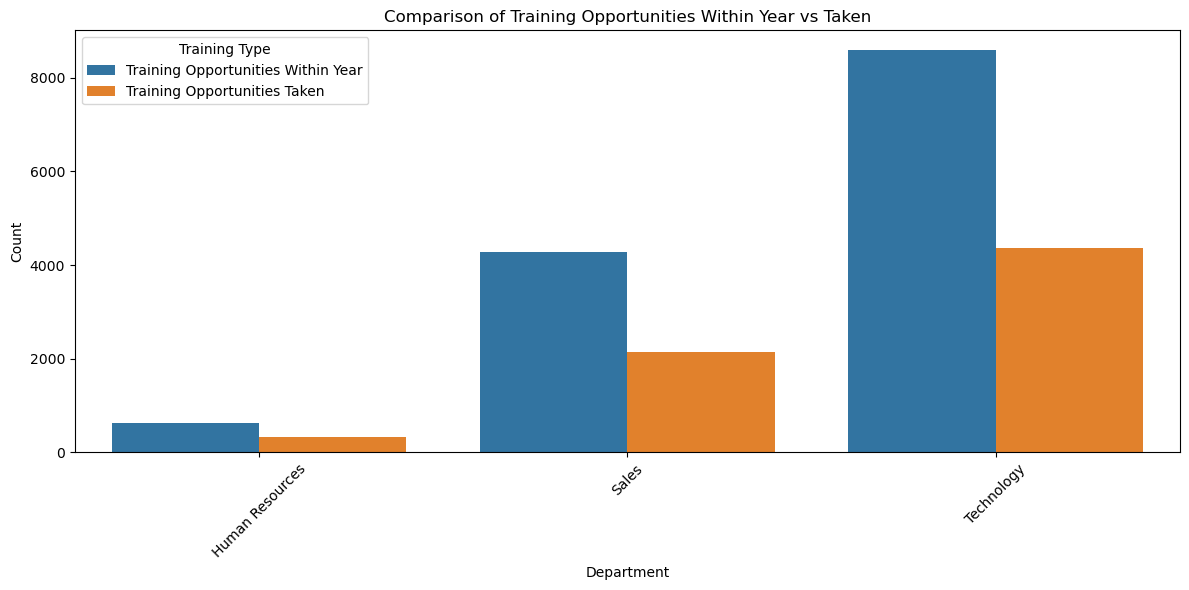

In [33]:
# Melt the data for seaborn compatibility
melted_data = pd.melt(grouped_data, id_vars='Department', 
                       value_vars=['Training Opportunities Within Year', 'Training Opportunities Taken'],
                       var_name='Training Type', value_name='Count')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='Count', hue='Training Type', data=melted_data)

# Customize the plot
plt.title('Comparison of Training Opportunities Within Year vs Taken')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Training Type')
plt.tight_layout()

# Show the plot
plt.show()
